In [7]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip -d ./  # Extracts in current directory


--2025-09-26 07:43:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 192.178.163.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   224MB/s    in 0.3s    

2025-09-26 07:43:50 (224 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [8]:
import os

base_dir = './cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Verify directories
print("Training directory exists?", os.path.exists(train_dir))
print("Validation directory exists?", os.path.exists(val_dir))
print("Contents of training directory:", os.listdir(train_dir))


Training directory exists? True
Validation directory exists? True
Contents of training directory: ['cats', 'dogs']


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


replace ./cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
Training directory exists? True
Validation directory exists? True
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training VGG16 (Feature Extraction)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 1366s 27s/step - accuracy: 0.6118 - loss: 0.6523 - val_accuracy: 0.8344 - val_loss: 0.4702
Epoch 2/2
13/50 ━━━━━━━━━━━━━━━━━━━━ 12:05 20s/step - accuracy: 0.8377 - loss: 0.4796

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 638s 13s/step - accuracy: 0.8279 - loss: 0.4819 - val_accuracy: 0.8547 - val_loss: 0.4344


✅ Saved vgg16_feature.h5

Training VGG16 (Fine-tuning)...
Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 1351s 27s/step - accuracy: 0.5759 - loss: 0.6680 - val_accuracy: 0.8250 - val_loss: 0.4759
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 645s 13s/step - accuracy: 0.7491 - loss: 0.5205 - val_accuracy: 0.8266 - val_loss: 0.4536


✅ Saved vgg16_fine.h5
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training ResNet50 (Feature Extraction)...
Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 450s 9s/step - accuracy: 0.5092 - loss: 0.7273 - val_accuracy: 0.5656 - val_loss: 0.6691
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.5594 - loss: 0.6877 - val_accuracy: 0.6078 - val_loss: 0.6678


✅ Saved resnet50_feature.h5

Training ResNet50 (Fine-tuning)...
Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 451s 9s/step - accuracy: 0.4984 - loss: 0.7751 - val_accuracy: 0.6187 - val_loss: 0.6696
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.5687 - loss: 0.6772 - val_accuracy: 0.5844 - val_loss: 0.6650


✅ Saved resnet50_fine.h5


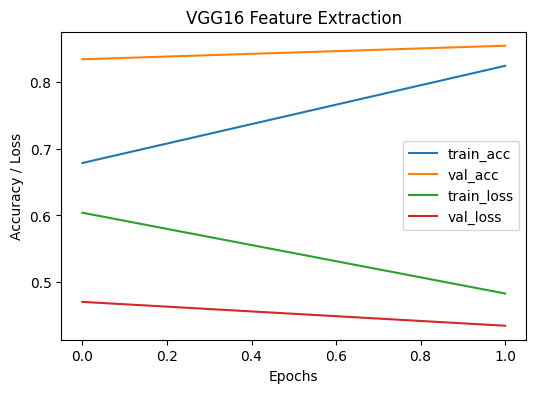

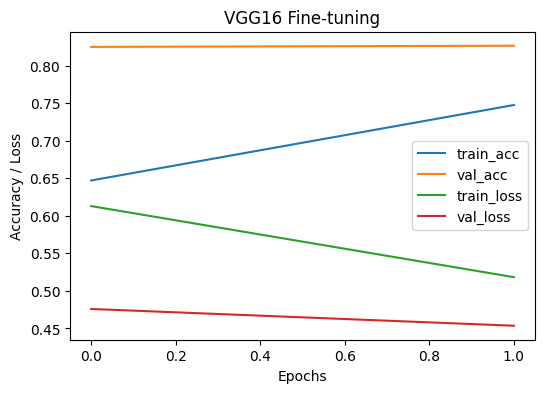

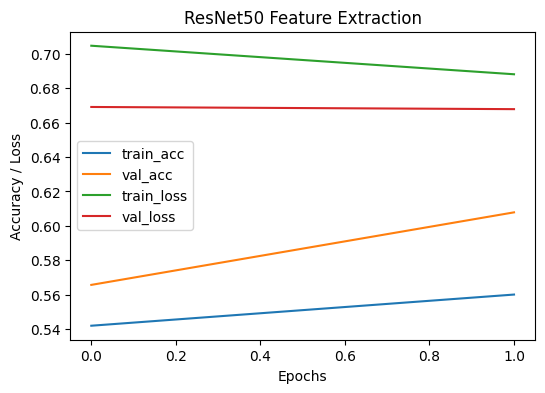

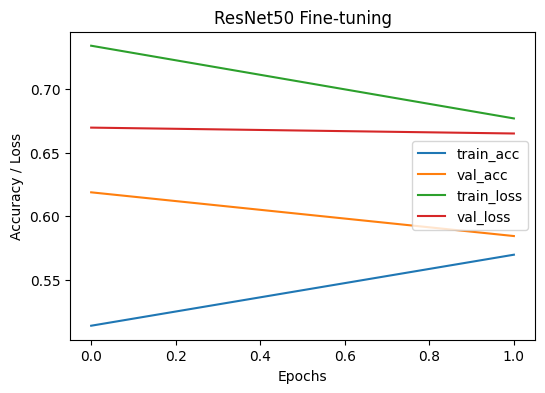


🎉 All experiments completed successfully!


In [10]:
# -------------------------------------------------------
# Dogs vs Cats - Transfer Learning (VGG16 & ResNet50)
# Feature Extraction + Fine-tuning
# -------------------------------------------------------

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# ==========================================
# 1. Data Preparation
# ==========================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Step 1: Download & extract dataset
!wget -q https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip -d ./

# Step 2: Define dataset paths
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

print("Training directory exists?", os.path.exists(train_dir))
print("Validation directory exists?", os.path.exists(val_dir))

# Step 3: Data augmentation + preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# ==========================================
# 2. Build Transfer Learning Model
# ==========================================
def build_model(base_model):
    base_model.trainable = False  # Feature extraction
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ==========================================
# 3. Train & Evaluate Function
# ==========================================
def train_and_evaluate(model, name, epochs=2, steps_per_epoch=50, validation_steps=20):
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        epochs=epochs
    )
    model.save(f"{name}.h5")
    print(f"✅ Saved {name}.h5")
    return history

# ==========================================
# 4. Plot Training Curves
# ==========================================
def plot_history(history, title):
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

# ==========================================
# 5. Run Experiments
# ==========================================

# ---- A. VGG16 Feature Extraction ----
vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=IMG_SIZE + (3,))
vgg_model = build_model(vgg_base)
print("\nTraining VGG16 (Feature Extraction)...")
vgg_history = train_and_evaluate(vgg_model, "vgg16_feature")

# ---- B. VGG16 Fine-tuning ----
vgg_base.trainable = True
for layer in vgg_base.layers[:-4]:
    layer.trainable = False
vgg_model_fine = build_model(vgg_base)
print("\nTraining VGG16 (Fine-tuning)...")
vgg_fine_history = train_and_evaluate(vgg_model_fine, "vgg16_fine")

# ---- C. ResNet50 Feature Extraction ----
resnet_base = ResNet50(weights="imagenet", include_top=False, input_shape=IMG_SIZE + (3,))
resnet_model = build_model(resnet_base)
print("\nTraining ResNet50 (Feature Extraction)...")
resnet_history = train_and_evaluate(resnet_model, "resnet50_feature")

# ---- D. ResNet50 Fine-tuning ----
resnet_base.trainable = True
for layer in resnet_base.layers[:-10]:
    layer.trainable = False
resnet_model_fine = build_model(resnet_base)
print("\nTraining ResNet50 (Fine-tuning)...")
resnet_fine_history = train_and_evaluate(resnet_model_fine, "resnet50_fine")

# ==========================================
# 6. Plot all results
# ==========================================
plot_history(vgg_history, "VGG16 Feature Extraction")
plot_history(vgg_fine_history, "VGG16 Fine-tuning")
plot_history(resnet_history, "ResNet50 Feature Extraction")
plot_history(resnet_fine_history, "ResNet50 Fine-tuning")

print("\n🎉 All experiments completed successfully!")
